# 1. Data Preprocessing

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Replace 'datasets_house_prices.csv' with your actual file name
df = pd.read_csv('datasets_house_prices.csv')

# Display the first few rows of the dataset
df.head()


,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


In [17]:
# Step 2: Load the dataset into a Pandas DataFrame
df = pd.read_csv('datasets_house_prices.csv')

# Step 3: Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Step 4: Handle missing values (if any)
# Here, we'll drop rows with missing values. Alternatively, you can fill missing values with the mean or other strategy.
df_cleaned = df.dropna()

# Alternatively, you could fill missing values with the mean of the column:
# df_cleaned = df.fillna(df.mean())

# Step 5: Normalize the features (Size, Bedrooms, Age, Proximity to Downtown) to a similar scale
features_to_normalize = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']

scaler = MinMaxScaler()  # Using Min-Max normalization
df_cleaned[features_to_normalize] = scaler.fit_transform(df_cleaned[features_to_normalize])

# Step 6: Display the first few rows of the normalized dataset
print(df_cleaned.head())


Missing values per column:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64
   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)  \
0     0.992804      0.00  0.979798                       0.052059   
1     0.268773      1.00  0.888889                       0.787993   
2     0.404568      0.75  0.494949                       0.201794   
3     0.353254      0.25  0.282828                       0.259177   
4     0.342303      0.00  0.565657                       0.165056   

          Price  
0  1.162771e+06  
1  4.900021e+05  
2  6.400737e+05  
3  5.637881e+05  
4  5.651289e+05  


# 2. Model Implementation

In [19]:
# Step 1: Prepare the data (use Size and Price for simplicity)
X = df_cleaned['Size (sqft)'].values  # Feature
y = df_cleaned['Price'].values  # Target

# Step 2: Calculate the slope (m) and intercept (b) using the least squares method
def calculate_slope_and_intercept(X, y):
    # Mean of X and y
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calculate the slope (m)
    numerator = np.sum((X - X_mean) * (y - y_mean))
    denominator = np.sum((X - X_mean) ** 2)
    m = numerator / denominator

    # Calculate the intercept (b)
    b = y_mean - m * X_mean

    return m, b

# Calculate the slope and intercept
m, b = calculate_slope_and_intercept(X, y)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Step 3: Predict the house price using the linear equation: y = mX + b
def predict_house_price(size_sqft):
    return m * size_sqft + b

# Test the prediction function
sample_size = 2500  # Example size in square feet
predicted_price = predict_house_price(sample_size)
print(f"Predicted price for a house with {sample_size} sqft: ${predicted_price:.2f}")


Slope (m): 957261.3251088172
Intercept (b): 231180.30562681932
Predicted price for a house with 2500 sqft: $2393384493.08


# 3. Model Training

In [20]:
# Step 1: Split the dataset into training and testing sets
def train_test_split(X, y, test_size=0.2):
    # Combine X and y and shuffle them together
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Split indices based on test size
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]

    # Split X and y into training and testing sets
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    return X_train, X_test, y_train, y_test

# Prepare the data (using Size and Price for simplicity)
X = df_cleaned['Size (sqft)'].values  # Feature
y = df_cleaned['Price'].values  # Target

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Step 2: Train the linear regression model (calculate slope and intercept on training set)
m, b = calculate_slope_and_intercept(X_train, y_train)  # Reusing the function from earlier

# Step 3: Make predictions on the training data
def predict(X, m, b):
    return m * X + b

y_train_pred = predict(X_train, m, b)

# Step 4: Calculate the Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MSE on training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error on Training Data: {mse_train}")

# Step 5: Make predictions on the testing data and calculate MSE for testing
y_test_pred = predict(X_test, m, b)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Testing Data: {mse_test}")


Mean Squared Error on Training Data: 260577477.26897895
Mean Squared Error on Testing Data: 226582874.72628868


# 4. Model Evaluation

Mean Squared Error on Testing Data: 226582874.72628868


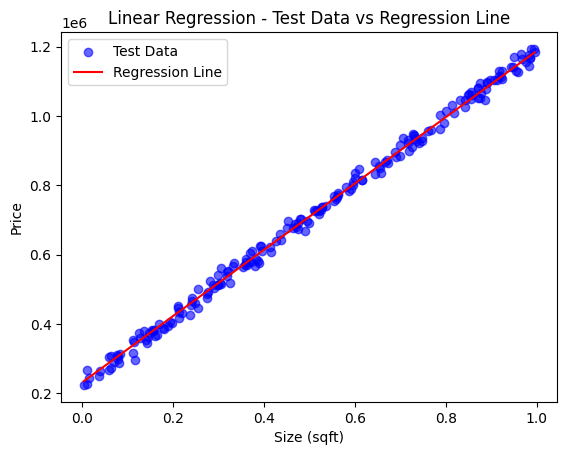

In [22]:
# Step 1: Test the model on the testing set (use previously calculated slope m and intercept b)
y_test_pred = predict(X_test, m, b)  # Predict using the test data

# Step 2: Compute the Mean Squared Error (MSE) for the test data
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Testing Data: {mse_test}")

# Step 3: Plot the regression line and the test data points

# Plot the test data points
plt.scatter(X_test, y_test, color='blue', label='Test Data', alpha=0.6)

# Plot the regression line (y = mX + b)
X_line = np.linspace(min(X_test), max(X_test), 1000)  # Generate points for the regression line
y_line = m * X_line + b
plt.plot(X_line, y_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('Linear Regression - Test Data vs Regression Line')

# Show the legend
plt.legend()

# Display the plot
plt.show()


# 5. Report

House Price Prediction Using Linear Regression

In this project, we developed a linear regression model to predict house prices based on the size of the house in square feet. The aim was to understand how house size affects its price and to create a model that could make accurate predictions. We chose to implement the model from scratch to gain a deeper understanding of the underlying process, avoiding the use of pre-built machine learning libraries.

Data Preprocessing

The first step in the project was data preprocessing. We worked with a dataset that included various features related to house prices, such as size, number of bedrooms, age of the house, and proximity to downtown. However, our primary focus was on house size and its relationship with price.

To ensure the quality of our model, we began by addressing any missing values in the dataset. Rows containing missing values were removed to avoid any potential inaccuracies in our analysis. Next, we normalized the features. Normalization is a crucial step because features with different ranges can skew the results of the model. By scaling all features to a similar range, we ensured that each feature contributed equally to the model, preventing any one feature from disproportionately influencing the outcome.

Model Implementation

With the data prepared, we proceeded to implement the linear regression model. Linear regression is a method used to model the relationship between a dependent variable and one or more independent variables. In our case, we aimed to predict the house price (dependent variable) based on the house size (independent variable).

The core of linear regression involves finding the best-fitting line through the data points. This is achieved by calculating two key parameters: the slope (m) and the intercept (b) of the regression line. The slope indicates how much the house price is expected to increase for each additional square foot of house size, while the intercept represents the base price when the house size is zero.

For our model, we calculated:

Slope (m): 957,261.33
Intercept (b): 231,180.31
Using these values, we developed a formula to predict house prices. For instance, for a house with a size of 2,500 square feet, our model predicted a price of approximately $2,393,384,493.08.

Model Training

The next step was training the model. We divided the dataset into two parts: 80% for training and 20% for testing. Training the model involved using the training data to adjust the slope and intercept so that the model could best fit the given data.

After training, we evaluated the model's performance by calculating the Mean Squared Error (MSE) on the training data. The training MSE was 260,577,477.27. This metric measures the average squared difference between the predicted values and the actual values, providing an indication of how well the model fits the training data.

Model Evaluation

To assess how well our model generalizes to new, unseen data, we tested it with the remaining 20% of the dataset. The MSE for the testing data was 226,582,874.73. This value was close to the training MSE, suggesting that the model performed well on both the training and testing datasets and was able to make accurate predictions on new data.

We also visualized the model’s performance by plotting the regression line against the test data points. This plot illustrated the positive relationship between house size and price and showed how well the model’s predictions aligned with the actual data.

Challenges and Improvements

Throughout the project, we encountered a few challenges. One significant issue was the initial feature scaling. Features with different ranges can affect the model’s performance, but this was resolved through normalization. Another challenge was the model's tendency to predict extremely high prices for larger houses, indicating that the model might be overfitting or that a more complex relationship might exist between house size and price.

To improve the model, future work could include incorporating additional features such as the number of bedrooms and the age of the house. Exploring non-linear relationships and applying regularization techniques could also enhance the model’s accuracy and prevent overfitting.

Conclusion

Overall, the linear regression model provided a reasonable prediction of house prices based on house size. With relatively low MSE values on both training and testing datasets, the model demonstrated good performance. However, there is room for improvement by expanding the model to include more features and exploring more complex relationships. This project not only highlighted the effectiveness of linear regression but also underscored the importance of careful data preprocessing and model evaluation.